<div id="qr" style="display:inline-block; align:left;vertical-align: middle;" >
  <h2>Social Media Sentiment Analysis</h2>
    <h4>Scrape Reddit user reviews</h4>
</div>
<div style="display:inline-block;vertical-align: middle;float:right;">
  <img style="float: right;" src='https://cdn.freebiesupply.com/logos/large/2x/gap-logo-png-transparent.png' width='100'>
</div>

<p>The idea is to understand what people are talking about these brands on social media websites like Reddit and use them to perform sentiment analysis and identify trending keywords.</p> <p>We have taken American Eagle as the competitor here.</p> <p><b>Note: </b>Banana Republic does not have a subreddit on Reddit so only GAP and OldNavy have been taken for this exercise. We can look at other fashion subreddits to pull Banana Republic reviews as well</p>

<h2> Table of Contents</h2>
<ol>
    <li><a href='#Import-Libraries'>Importing Libraries</a></li>
    <li><a href='#Scrape-Subreddits'>Scraping Subreddits</a></li>
    <li><a href='#Sentiment-analysis'>Sentiment Analysis</a></li>
</ol>

## Import Libraries

In [2]:
# !pip install praw

In [2]:
import praw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

reddit = praw.Reddit(
    client_id='DdIrYscjjeFPfI4YYIfsrw',
    client_secret='K0jjcXNedyAvEYrJuOXLMl2kQbv7Zw',
    user_agent='BrandGapScraper',
)

## Scrape Subreddits

### GAP Subreddit

In [3]:
# Scrape data using Reddit API
gap_subreddit = []
subreddit = reddit.subreddit('GapInc')
brand_gap_posts = subreddit.search('GAP', sort='new', time_filter='all')

for post in brand_gap_posts:
    gap_subreddit.append(post.title)
gap_subreddit
gap_subreddit = pd.DataFrame(gap_subreddit)
gap_subreddit.columns = ['Comment']
gap_subreddit = gap_subreddit.drop([23,24])
gap_subreddit

,Comment
0,How do i use my old navy (aka GAP Inc.) discou...
1,Thread login
2,HTH does this drawstring work on Gap Power leg...
3,What is the name brand of these sandals that m...
4,Looking for a poster used in GAP stores from t...
5,Gap withdraws outlook for the year citing econ...
6,Just a quick question
7,Where do I put my resume for my application?
8,Keep the GAPCASH safe!!
9,Job Referral


### Old Navy Subreddit

In [4]:
on_subreddit = []
subreddit = reddit.subreddit('OldNavy')
brand_on_posts = subreddit.search('OldNavy', sort='new', time_filter='all')

for post in brand_on_posts:
    on_subreddit.append(post.title)
on_subreddit = pd.DataFrame(on_subreddit)
on_subreddit.columns = ['Comment']
on_subreddit

,Comment
0,Merchandise Supervisor
1,Management training
2,How can I figure out what a position will pay?
3,Employee Discount
4,Item Restock
...,...
95,Buy now or wait for Labor Day?
96,How often is management supposed to close/work...
97,OldNavy cancelled my order
98,Attendance


### American Eagle subreddit - Competitor

In [5]:
ae_subreddit = []
subreddit = reddit.subreddit('americaneagle')
brand_ae_posts = subreddit.search('americaneagle', sort='new', time_filter='all')

for post in brand_ae_posts:
    ae_subreddit.append(post.title)
ae_subreddit = pd.DataFrame(ae_subreddit)
ae_subreddit.columns = ['Comment']
ae_subreddit

,Comment
0,"Just got put for a group interview tomorrow, a..."
1,App Network Error
2,interview
3,Dress code
4,Job application
...,...
95,Can Aerie take back rewards after you used the...
96,How do I identify the style and color of Ameri...
97,Does American Eagle still make Christmas socks...
98,Help!! pants size for skinny jeans?


## Sentiment analysis

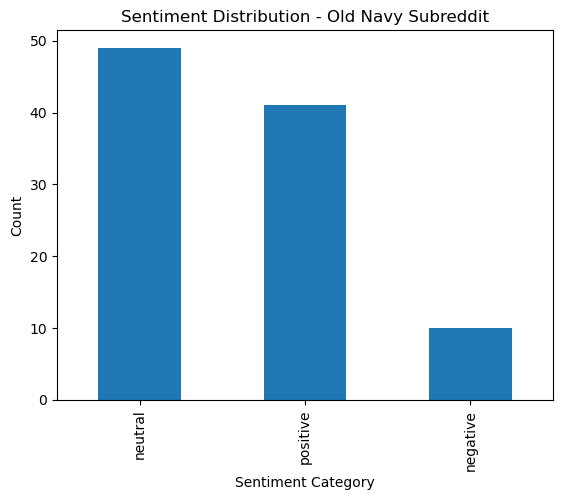

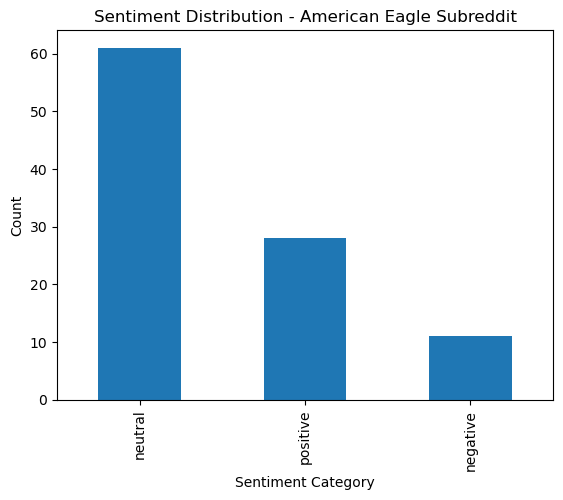

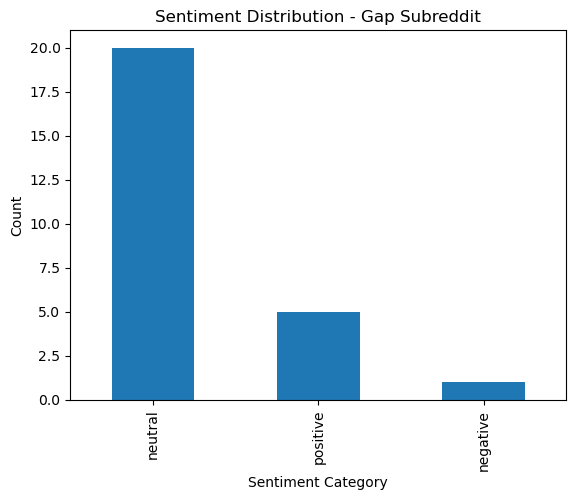

In [9]:
def categorize_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"
sid = SentimentIntensityAnalyzer()

dataframes = [("Old Navy Subreddit", on_subreddit), ("American Eagle Subreddit", ae_subreddit), ("Gap Subreddit", gap_subreddit)]

# Process each DataFrame
for df_name, df in dataframes:
    df["sentiment"] = df["Comment"].apply(lambda x: sid.polarity_scores(x)["compound"])
    df["sentiment_category"] = df["sentiment"].apply(categorize_sentiment)

# Plot sentiment distribution for each DataFrame with names
for df_name, df in dataframes:
    plt.figure()
    sentiment_counts = df["sentiment_category"].value_counts()
    sentiment_counts.plot(kind="bar", title=f"Sentiment Distribution - {df_name}")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Count")
    plt.show()

In [7]:
nltk.download("vader_lexicon") # Replace with your actual data source
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


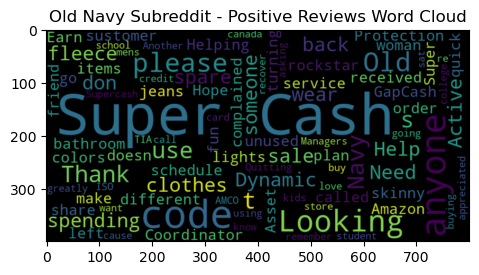

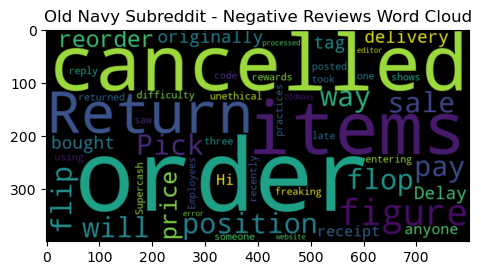

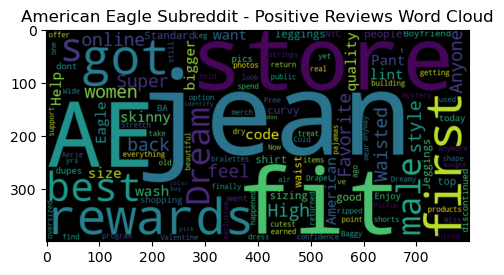

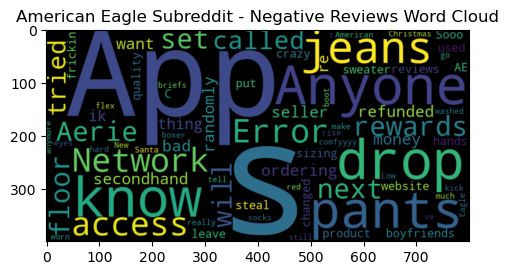

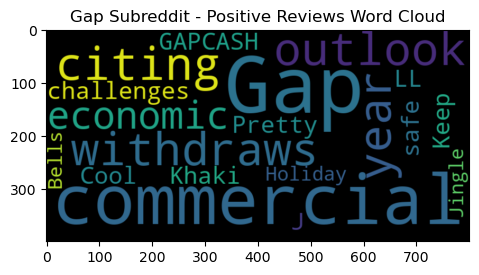

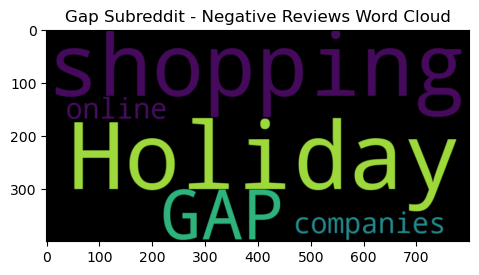

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have the positive_reviews and negative_reviews for each DataFrame

# Combine the DataFrames into a list with names
dataframes = [("Old Navy Subreddit", on_subreddit), ("American Eagle Subreddit", ae_subreddit), ("Gap Subreddit", gap_subreddit)]

for df_name, df in dataframes:
    positive_reviews = " ".join(df[df["sentiment_category"] == "positive"]["Comment"])
    negative_reviews = " ".join(df[df["sentiment_category"] == "negative"]["Comment"])

    if len(positive_reviews) > 0:
        wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud_positive, interpolation="bilinear")
        plt.title(f"{df_name} - Positive Reviews Word Cloud")
        plt.show()

    if len(negative_reviews) > 0:
        wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud_negative, interpolation="bilinear")
        plt.title(f"{df_name} - Negative Reviews Word Cloud")
        plt.show()


<h4>Findings: </h4>
<p>American eagle has a lot more words related to their product in the positive section whereas for GAP and Old Navy, they are talking more about sales/discount and coupons.</p>
<h4>Insights: </h4><p> It does look like that people like American Eagle's products from this sample dataset whereas there could be more focus put on GAP products. </p><p>This method can be used to perform similar analysis over social media sites like Twitter, Instagram and Pinterest. We can understand the general sentiment and some trending words. </p>